**OUTLIER DETECTION AND HANDLING - NUMERICAL DATA**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3a_outliers_cat.csv' # Fill your path to file
df = pd.read_csv(input_csv, sep = ',')

df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,NaN,1600.000000,NaN,Brabant_Wallon,NaN,True


**Number of bedrooms**

<Axes: xlabel='Number_of_bedrooms'>

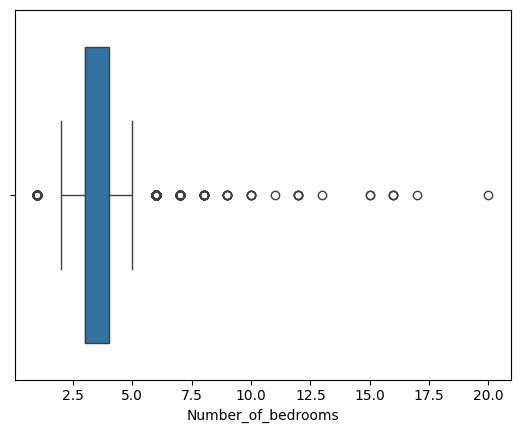

In [14]:
# to see outliers from Number_of_bedrooms in boxplot

sns.boxplot(x=df['Number_of_bedrooms'], orient='h')

In [15]:
upper_limit = df['Number_of_bedrooms'].mean() + 4*df['Number_of_bedrooms'].std()

lower_limit = df['Number_of_bedrooms'].mean() - 4*df['Number_of_bedrooms'].std()

print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 8.310316369128945
lower limit: -1.36382157838199


In [16]:
# find the outlier

df.loc[(df['Number_of_bedrooms'] > upper_limit) | (df['Number_of_bedrooms'] < lower_limit)]

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land
182,20240646,Woluwe-Saint-Lambert,1200,790000,House,10,362,Avenue De Juillet,44,50.847921,4.414961,0,0,1,5,50,Hyper equipped,2,To renovate,0,G,250.0,2182.320442,3160.000000
534,20246583,Grez-Doiceau,1390,649000,House,10,407,Petite Rue Des Prés,6,50.738804,4.661776,0,0,1,10,0,Installed,4,To renovate,0,D,720.0,1594.594595,901.388889
1657,20150570,Ieper,8900,719000,House,12,559,Colaertplein,5,50.849124,2.877171,0,0,0,0,340,NaN,2,To renovate,0,F,653.0,1286.225403,1101.071975
2695,20152610,Wavre,1300,695000,House,9,420,Avenue Montesquieu,25,50.714741,4.634883,0,0,1,0,0,Installed,4,Good,0,C,1439.0,1654.761905,482.974288
3347,20099588,Gent,9000,1150000,House,15,950,Geldmunt,22,51.057414,3.721374,0,0,0,0,23,Installed,3,To restore,0,F,298.0,1210.526316,3859.060403
3625,11021515,Anderlecht,1070,900000,House,9,270,Chaussée De Mons,1199,50.820105,4.292984,0,0,1,30,60,Hyper equipped,2,Just renovated,0,F,150.0,3333.333333,6000.000000
3628,11211836,Sint-Pieters-Leeuw Vlezenbeek,1602,1200000,House,12,350,Postweg,13,50.813056,4.256253,0,0,1,100,800,Hyper equipped,3,Just renovated,0,E,1000.0,3428.571429,1200.000000
3677,20218685,Huy,4500,400000,House,13,1600,Place Du Tilleul,7,50.514404,5.236613,0,0,0,0,0,NaN,0,Good,0,NaN,723.0,250.000000,553.250346
3727,20215116,Beauraing,5570,350000,House,16,520,"Givet -France , Route De Bonsecours",128-130,50.148602,4.824084,0,0,0,0,547,NaN,0,Good,0,D,547.0,673.076923,639.853748
3938,10432397,Sint-Michiels,8200,770000,House,12,382,Dorpsstraat,121,51.187665,3.214165,0,0,1,0,190,NaN,2,As new,0,D,412.0,2015.706806,1868.932039


In [17]:
# remove outliers

df_bedrooms = df.loc[(df['Number_of_bedrooms'] < upper_limit) & (df['Number_of_bedrooms'] > lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(df_bedrooms))
print('outliers:', len(df) - len(df_bedrooms))

befor removing outliers: 5663
after removing outliers: 5640
outliers: 23


<Axes: xlabel='Number_of_bedrooms'>

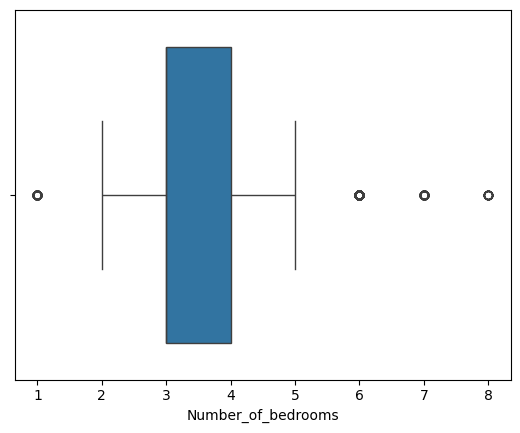

In [18]:
# to see outliers from Number_of_bedrooms in boxplot

sns.boxplot(x=df_bedrooms['Number_of_bedrooms'], orient='h')

In [19]:
df_bedrooms['Number_of_bedrooms'].agg(['count','skew','mean','median'])

count     5640.000000
skew         0.845882
mean         3.437589
median       3.000000
Name: Number_of_bedrooms, dtype: float64

**Living area**

<Axes: xlabel='Living_area'>

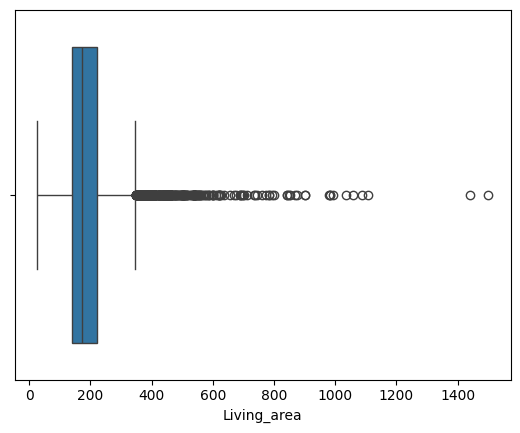

In [20]:
# to see outliers from Living area in boxplot

sns.boxplot(x=df_bedrooms['Living_area'], orient='h')

count     5283.000000
skew         0.609516
mean       177.665910
median     170.000000
Name: Living_area, dtype: float64

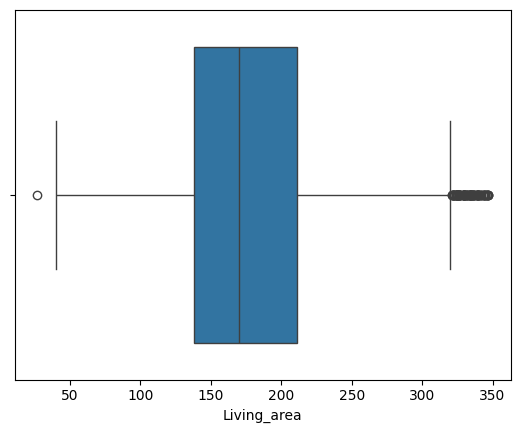

In [21]:
# Outliers by 'Living area' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = df_bedrooms['Living_area'].quantile(0.25)
q3 = df_bedrooms['Living_area'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
df_bedrooms = df_bedrooms[(df_bedrooms['Living_area'] >= lower_bound) & 
                            (df_bedrooms['Living_area'] <= upper_bound)]

# Display first 5 rows
df_bedrooms['Living_area'].value_counts

sns.boxplot(x=df_bedrooms['Living_area'], orient='h')
df_bedrooms['Living_area'].agg(['count','skew','mean','median'])

**Price**

<Axes: xlabel='Price'>

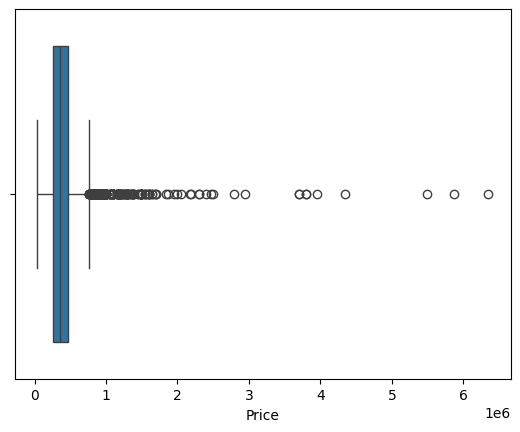

In [22]:
# to see outliers from Price in boxplot

sns.boxplot(x=df_bedrooms['Price'], orient='h')

count       5011.000000
skew           0.520237
mean      360542.925364
median    349000.000000
Name: Price, dtype: float64

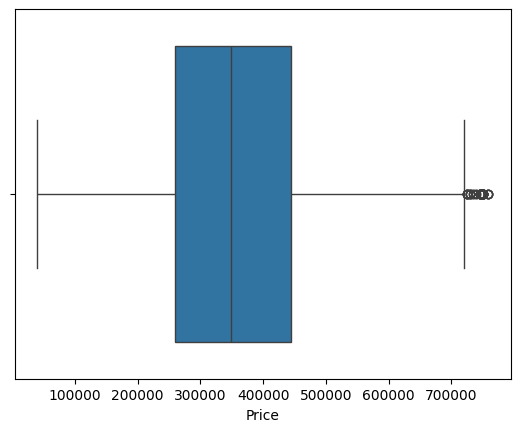

In [23]:
# Outliers by 'Price' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = df_bedrooms['Price'].quantile(0.25)
q3 = df_bedrooms['Price'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
df_bedrooms = df_bedrooms[(df_bedrooms['Price'] >= lower_bound) & 
                            (df_bedrooms['Price'] <= upper_bound)]



sns.boxplot(x=df_bedrooms['Price'], orient='h')
df_bedrooms['Price'].agg(['count','skew','mean','median'])



**Price per sqm*

<Axes: xlabel='price_per_sqm'>

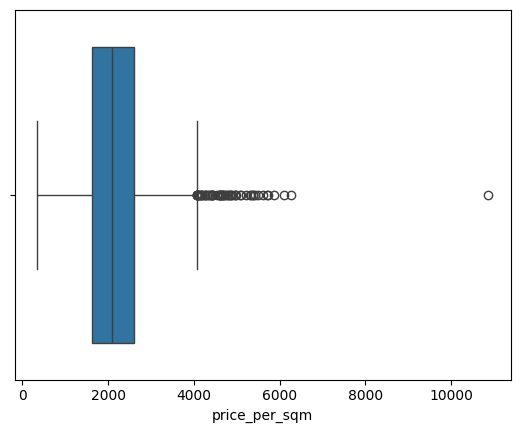

In [24]:
# to see outliers from Price in boxplot

sns.boxplot(x=df_bedrooms['price_per_sqm'], orient='h')

count     4947.000000
skew         0.290995
mean      2111.734460
median    2066.115702
Name: price_per_sqm, dtype: float64

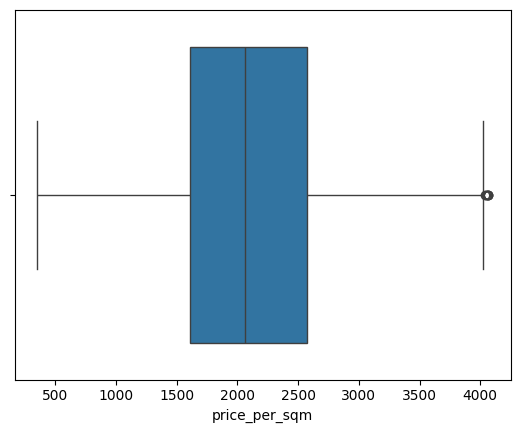

In [25]:
# Outliers by 'Price' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = df_bedrooms['price_per_sqm'].quantile(0.25)
q3 = df_bedrooms['price_per_sqm'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
df_bedrooms = df_bedrooms[(df_bedrooms['price_per_sqm'] >= lower_bound) & 
                            (df_bedrooms['price_per_sqm'] <= upper_bound)]



sns.boxplot(x=df_bedrooms['price_per_sqm'], orient='h')
df_bedrooms['price_per_sqm'].agg(['count','skew','mean','median'])



In [26]:
df_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 5662
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4947 non-null   int64  
 1   locality_name       4947 non-null   object 
 2   Postal_code         4947 non-null   object 
 3   Price               4947 non-null   int64  
 4   Subtype             4947 non-null   object 
 5   Number_of_bedrooms  4947 non-null   int64  
 6   Living_area         4947 non-null   int64  
 7   street              4947 non-null   object 
 8   number              4931 non-null   object 
 9   latitude            4947 non-null   float64
 10  longitude           4947 non-null   float64
 11  Open_fire           4947 non-null   int64  
 12  Swimming_Pool       4947 non-null   int64  
 13  hasTerrace          4947 non-null   int64  
 14  terraceSurface      4947 non-null   int64  
 15  gardenSurface       4947 non-null   int64  
 16  Kitchen_typ

**Saving data to a new .csv file and a .pkl file**

In [ ]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3b_outliers_num.csv'  # Fill your path to file
df_bedrooms.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3b_outliers_num.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_bedrooms, f)